<a href="https://colab.research.google.com/github/ankitabishttt/DAA-Lab-Assignment-4/blob/main/DAA_lab_Assignmnet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Sub-Task 1: Input

# Flights -> (Flight ID, Start Time, End Time)
flights = [
    ('F1', 9, 11),
    ('F2', 10, 12),
    ('F3', 13, 15),
    ('F4', 16, 18),
    ('F5', 11, 13)
]

# Crew members
crew_members = ['C1', 'C2', 'C3']
MIN_REST = 1

# Sub-Task 2: Approach

def is_valid_assignment(new_flight, assigned_flights, min_rest=MIN_REST):
    """Checks if a flight can be assigned to a crew member."""
    _, start, end = new_flight
    for _, s, e in assigned_flights:

        if not (end + min_rest <= s or e + min_rest <= start):
            return False
    return True


def assign_flights_backtracking(flights, crews, min_rest=MIN_REST):
    """Recursive backtracking to assign flights to crew members."""
    assignment = {c: [] for c in crews}
    recursion_calls = {"count": 0}

    def backtrack(index):
        recursion_calls["count"] += 1

        if index == len(flights):
            return True
        flight = flights[index]
        for crew in crews:
            if is_valid_assignment(flight, assignment[crew], min_rest):
                assignment[crew].append(flight)
                if backtrack(index + 1):
                    return True
                assignment[crew].pop()
        return False

    ok = backtrack(0)
    return (assignment if ok else None), recursion_calls["count"]

In [2]:
# Sub-Task 3: Output

def assignment_to_mapping(assign_dict):
    return {c: [f[0] for f in sorted(assign_dict[c], key=lambda x: x[1])]
            for c in assign_dict}

solution, calls = assign_flights_backtracking(flights, crew_members)
print("✅ Assignment mapping:")
print(assignment_to_mapping(solution) if solution else "No valid schedule found.")
print("Recursive calls:", calls)

✅ Assignment mapping:
{'C1': ['F1', 'F3', 'F4'], 'C2': ['F2'], 'C3': ['F5']}
Recursive calls: 6


In [3]:
# Sub-Task 4: Analysis

print("🧩 ANALYSIS")
print("• Airline crew scheduling is NP-hard — same family as job-scheduling problems.")
print("• Brute-force and backtracking grow exponentially with flight count.")
print("• Time complexity = O(k × 2ⁿ) where n = flights, k = crew members.")
print("• Works only for small n (e.g., ≤10).")
print("• Improvements:")
print("  – Greedy or heuristic search to prune branches.")
print("  – Integer Linear Programming (PuLP / OR-Tools).")
print("  – Constraint-solvers (Z3, OR-Tools CP-SAT).")

🧩 ANALYSIS
• Airline crew scheduling is NP-hard — same family as job-scheduling problems.
• Brute-force and backtracking grow exponentially with flight count.
• Time complexity = O(k × 2ⁿ) where n = flights, k = crew members.
• Works only for small n (e.g., ≤10).
• Improvements:
  – Greedy or heuristic search to prune branches.
  – Integer Linear Programming (PuLP / OR-Tools).
  – Constraint-solvers (Z3, OR-Tools CP-SAT).


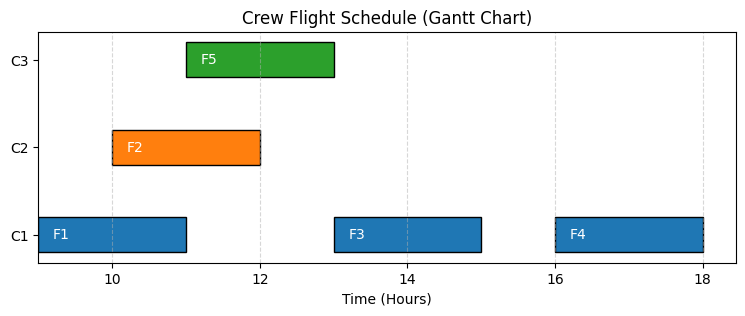

In [4]:
# Sub-Task 5: Visualization – Gantt Chart

import matplotlib.pyplot as plt

def plot_gantt(assign):
    if not assign:
        print("No schedule to visualize.")
        return
    crews = list(assign.keys())
    colors = ['tab:blue','tab:orange','tab:green']
    plt.figure(figsize=(9,3))
    for i, crew in enumerate(crews):
        for flight in assign[crew]:
            fid, s, e = flight
            plt.barh(i, e-s, left=s, color=colors[i % len(colors)],
                     edgecolor='black', height=0.4)
            plt.text(s+0.2, i, fid, va='center', color='white')
    plt.yticks(range(len(crews)), crews)
    plt.xlabel("Time (Hours)")
    plt.title("Crew Flight Schedule (Gantt Chart)")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

plot_gantt(solution)

Flights=4  Time=0.00007s  Mem=0.001MB  Calls=5
Flights=5  Time=0.00007s  Mem=0.001MB  Calls=6
Flights=6  Time=0.00005s  Mem=0.001MB  Calls=7
Flights=7  Time=0.00006s  Mem=0.001MB  Calls=8
Flights=8  Time=0.00006s  Mem=0.001MB  Calls=9
Flights=9  Time=0.00087s  Mem=0.001MB  Calls=103
Flights=10  Time=0.00458s  Mem=0.001MB  Calls=526


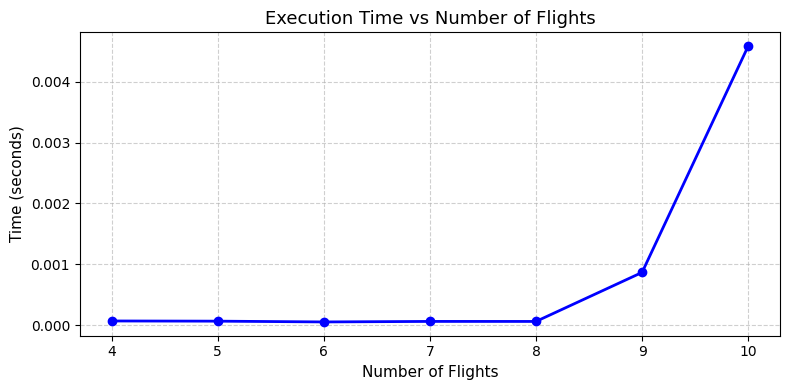


--------------------------------------------------------------------------------



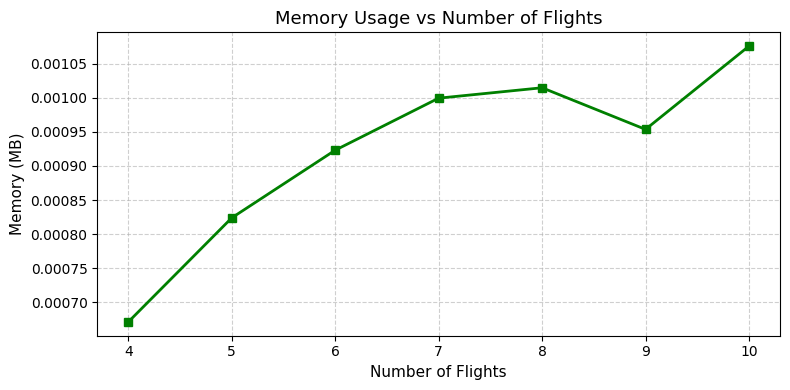


--------------------------------------------------------------------------------



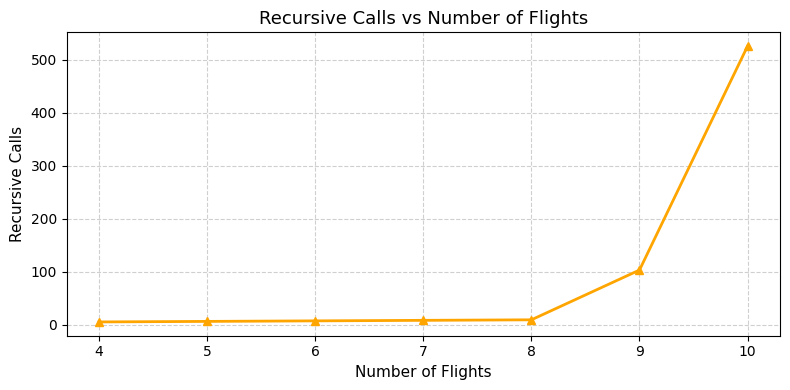


📊 DISCUSSION:
• As the number of flights increases, execution time and recursion calls grow exponentially.
• This confirms the NP-hard nature of the problem — backtracking becomes infeasible for large n.
• Memory usage rises slowly due to recursion stack and intermediate lists.
• The algorithm works well for small datasets but not for real airline data.
• Real-world scheduling uses optimization and heuristic-based algorithms like ILP or Google OR-Tools.

🧮 FINAL COMPLEXITY:
Time Complexity  →  O(k × 2ⁿ)
Space Complexity →  O(n + k) + recursion stack O(n)
Nature of Problem → NP-Hard (Exponential Growth)


In [5]:
import time, tracemalloc, random

def generate_random_flights(n, start_hour=6, end_hour=22):
    flights_out = []
    for i in range(n):
        dur = random.randint(1,3)
        s = random.randint(start_hour, end_hour-dur)
        e = s + dur
        flights_out.append((f'F{i+1}', s, e))
    return flights_out

def profile_run(flights_n, crew_list):
    tracemalloc.start()
    t0 = time.perf_counter()
    _, calls = assign_flights_backtracking(flights_n, crew_list)
    t1 = time.perf_counter()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return t1-t0, peak/(1024*1024), calls

sizes = [4,5,6,7,8,9,10]
times, mems, recs = [], [], []

for n in sizes:
    fset = generate_random_flights(n)
    t, m, c = profile_run(fset, crew_members)
    times.append(t); mems.append(m); recs.append(c)
    print(f"Flights={n}  Time={t:.5f}s  Mem={m:.3f}MB  Calls={c}")

plt.figure(figsize=(8, 4))
plt.plot(sizes, times, marker='o', color='blue', linewidth=2)
plt.title("Execution Time vs Number of Flights", fontsize=13)
plt.xlabel("Number of Flights", fontsize=11)
plt.ylabel("Time (seconds)", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n" + "-"*80 + "\n")

plt.figure(figsize=(8, 4))
plt.plot(sizes, mems, marker='s', color='green', linewidth=2)
plt.title("Memory Usage vs Number of Flights", fontsize=13)
plt.xlabel("Number of Flights", fontsize=11)
plt.ylabel("Memory (MB)", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n" + "-"*80 + "\n")

plt.figure(figsize=(8, 4))
plt.plot(sizes, recs, marker='^', color='orange', linewidth=2)
plt.title("Recursive Calls vs Number of Flights", fontsize=13)
plt.xlabel("Number of Flights", fontsize=11)
plt.ylabel("Recursive Calls", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n📊 DISCUSSION:")
print("• As the number of flights increases, execution time and recursion calls grow exponentially.")
print("• This confirms the NP-hard nature of the problem — backtracking becomes infeasible for large n.")
print("• Memory usage rises slowly due to recursion stack and intermediate lists.")
print("• The algorithm works well for small datasets but not for real airline data.")
print("• Real-world scheduling uses optimization and heuristic-based algorithms like ILP or Google OR-Tools.")

print("\n🧮 FINAL COMPLEXITY:")
print("Time Complexity  →  O(k × 2ⁿ)")
print("Space Complexity →  O(n + k) + recursion stack O(n)")
print("Nature of Problem → NP-Hard (Exponential Growth)")